In [96]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import os
import pickle

In [81]:
with open("/cvlabsrc1/cvlab/datasets_leo/neurons_tabea/orig/ACQ_2/jy170510_A_idC_100x.SWC", "r") as f:
    lines = list(f)

In [82]:
graph = nx.Graph()

for id in data.keys():
    
    current = data[id]
    graph.add_node(current.id, pos=current.pos)
    
    if current.parent_id == -1:
        continue
    parent = data[current.parent_id]
    graph.add_edge(current.id, parent.id) 

In [ ]:
graph = nx.Graph()
for id in data.keys():
    
    current = data[id]
    graph.add_node(current.id, pos=current.pos)
    
    if current.parent_id == -1:
        continue
    parent = data[current.parent_id]
    
    p1 = (current.pos + translation)*scale
    p2 = (parent.pos+ translation)*scale
    
    p1[1] = volume_shape[1] - p1[1]
    p2[1] = volume_shape[1] - p2[1]
    
    p1 = np.around(p1)
    p2 = np.around(p2)
    
    # we want to go from parent node to current node
    direction = p1-p2
    mag = np.linalg.norm(direction)
    direction = direction/(mag*5)
    
    v = [p2]
    while not np.all(np.around(v[-1])==p1):
        v.append(v[-1] + direction)
    v = np.int_(np.around(v))
        
    volume[v[:,1],v[:,0],v[:,2]] = 1 

In [125]:
np.sum(edges_nc)

16408

In [83]:
def plot_graph(graph, node_size=200, font_size=6, 
               matched=[], false_pos=[], false_neg=[], 
               node_color=None, edge_color='c', **kwargs):

    pos = dict({i:graph.nodes.data()[i]['pos'][:2] for i in graph.nodes()})
    nx.draw_networkx(graph, pos=pos, node_size=node_size, node_color=node_color,
                     edge_color=edge_color, **kwargs)
    plt.gca().invert_yaxis()
    plt.legend()

<IPython.core.display.Javascript object>


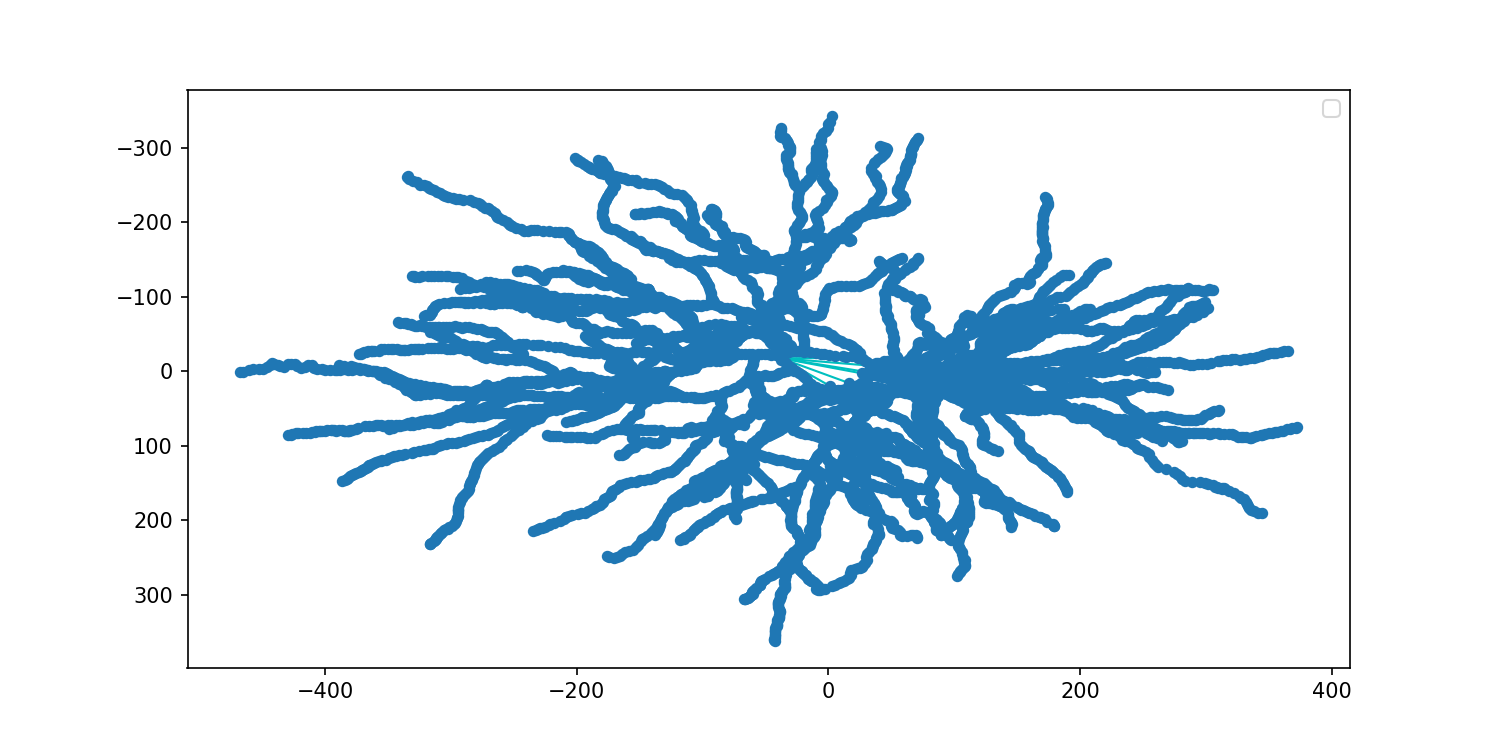

/home/citraro/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
No handles with labels found to put in legend.


In [84]:
plt.figure(figsize=(10,5))
plot_graph(graph, with_labels=False, edgelist=None, node_size=20)

In [104]:
n_nodes

8205

In [107]:
n_nodes = len(graph.nodes())
edges_nc = np.zeros((n_nodes,n_nodes), np.bool)

for s,t in graph.edges():
    edges_nc[s-1,t-1] = True
    edges_nc[t-1,s-1] = True
    
inds_nc = np.int64([graph.nodes.data()[i]['pos'] for i in graph.nodes()])
inds_nc.shape    

In [108]:
inds_nc = np.array([graph.nodes.data()[i]['pos'] for i in graph.nodes()])
inds_nc.shape

(8205, 3)

In [121]:
np.where(edges_nc)

(array([   0,    1,    1, ..., 8203, 8203, 8204]),
 array([   1,    0,    2, ..., 8202, 8204, 8203]))

In [116]:
imgdir="/cvlabsrc1/cvlab/datasets_leo/neurons_tabea/orig/img/train"
lbldir="/cvlabsrc1/cvlab/datasets_leo/neurons_tabea/orig/lbl/train"
testimgdir="/cvlabsrc1/cvlab/datasets_leo/neurons_tabea/orig/img/test"
testlbldir="/cvlabsrc1/cvlab/datasets_leo/neurons_tabea/orig/lbl/test"
exec(open("testFiles_tabea.txt").read())
exec(open("trainFiles_tabea.txt").read())

datadir="/cvlabsrc1/cvlab/datasets_leo/neurons_tabea/orig/"
graphdir=os.path.join(datadir,"lbl_graph")
#os.mkdir(graphdir)
traingraphdir=os.path.join(graphdir,"train")
#os.mkdir(traingraphdir)
testgraphdir=os.path.join(graphdir,"test")
#os.mkdir(testgraphdir)

f = trainFiles[0]

graphs=[]
graphs.append([f, edges_nc.astype(np.bool), inds_nc.astype(np.int64)])

# save training ground truth graphs
for gr in graphs:
    ff=open(os.path.join(traingraphdir,gr[0][1]),"bw")
    gt={'edges':gr[1],'node_coordinates':gr[2]}
    pickle.dump(gt,ff)
    ff.close()

In [123]:
os.path.join(testlbldir,gr[0][1])

'/cvlabsrc1/cvlab/datasets_leo/neurons_tabea/orig/lbl/test/acq_2_label_final.tif'

<IPython.core.display.Javascript object>


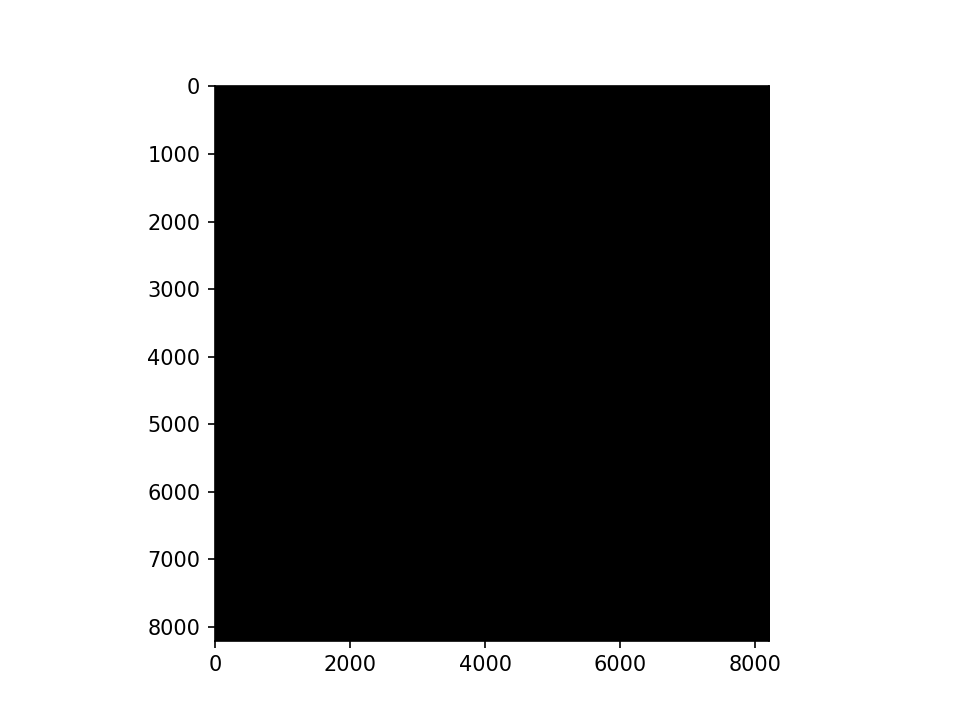

In [109]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(edges_nc)